# Vector paraxial XY

Vector_paraxial_XY is a set of three modules for:

* Generation of 2D (xy-axis) paraxial vector light source.
* Generation of 2D (xy-axis) paraxial vector masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields.

These modules are named: vector_paraxial_fields_XY.py, vector_paraxial_sources_XY.py, and vector_paraxial_masks_XY.py.

Each module present a main class:

* Vector_paraxial_field_XY
* Vector_paraxial_mask_XY
* Vector_paraxial_source_XY

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.wavelength (float): wavelength of the incident field.
* (numpy.array): complex field with size 2D x.y  
    - self.Ex, 
    - self.Ey

    
We can also find these atributes:
* self.X (numpy.array): equal size to x * y. complex field
* self.Y (numpy.array): equal size to x * y. complex field
* self.quality (float): quality of RS propagation. Valid for values > 1.
* self.info (str): description of data.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

## Generation of light sources

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

### Creating an instance

In [3]:
from diffractio import degrees,  mm,  nm, np, plt, sp, um

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY

number of processors: 8


In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6

### Generating light sources

Light sources are defined in the scalar_sources_xy.py module. When the field is initialized, the amplitude of the field is zero. Vector sources are generated using a scalar source and providing a vector polarization. There are many methods to convert a scalar source to a vector source:

* **constant_wave**: Generates a plane wave with a given direction and amplitude.
* **radial_wave**: Generates a plane wave with radial polarization.
* **transversal_wave**: Generates a plane wave with transversa polarization.
* **radial_inverse_wave**: 
* **transversal_inverse_wave*:
* **local_polarized_vector_beam**: Local radial polarized vector wave.
* **local_polarized_vector_beam_radial**: Local radial polarized vector wave.
* **local_polarized_vector_beam_hybrid**: Local hibrid polarized vector wave.
* **spiral_polarized_beam**: Spiral polarized wave.

For a more detailed description of each method, refer to the individual documentation of each one.

Example: gauss radial_wave

In [26]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)

wavelength = 0.6328 * um

Scalar source

In [27]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(d
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

Vector source

In [28]:
EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.radial_wave(u=u0, r0=(0,0), radius=(200,200))

If we need, we can convert the $E_x$ and $E_y$ fields in Scalar_field_XY.

In [29]:
Ex,Ey=EM.get()
print(Ex)

Scalar_field_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um
 - ymin:       -125.00 um,  ymax:      125.00 um
 - Imin:       0.00,     Imax:      0.99
 - phase_min:  -180.00 deg, phase_max: 0.00 deg
 - wavelength: 0.63 um
 - date:       2019-10-15_22_46_58
 - info:       



We can obtain a variety of representation, simply using the draw method.

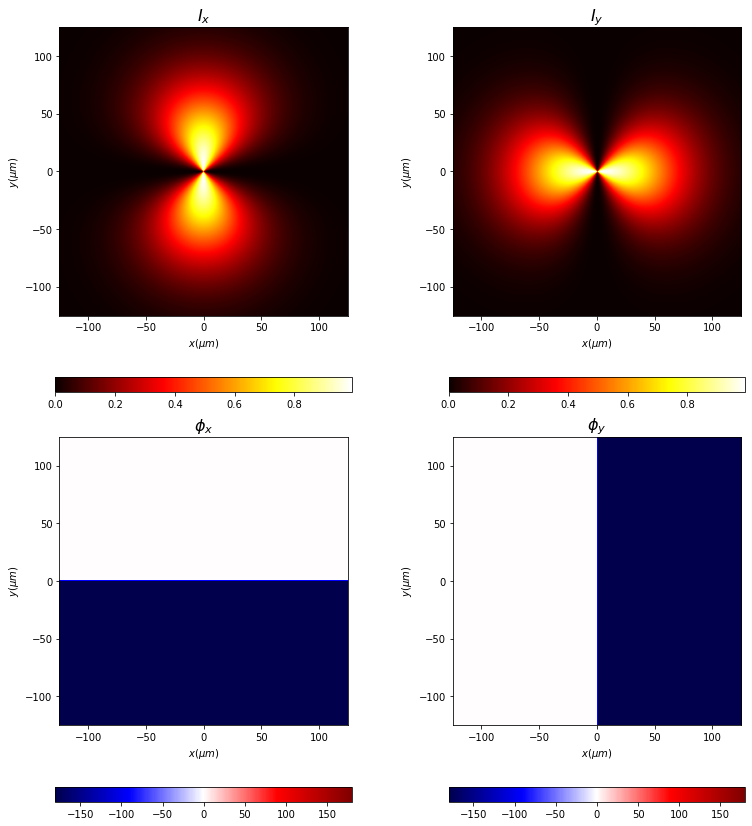

In [30]:
EM.draw(kind='fields');

Polarimetric representation can be performed in a simple way.

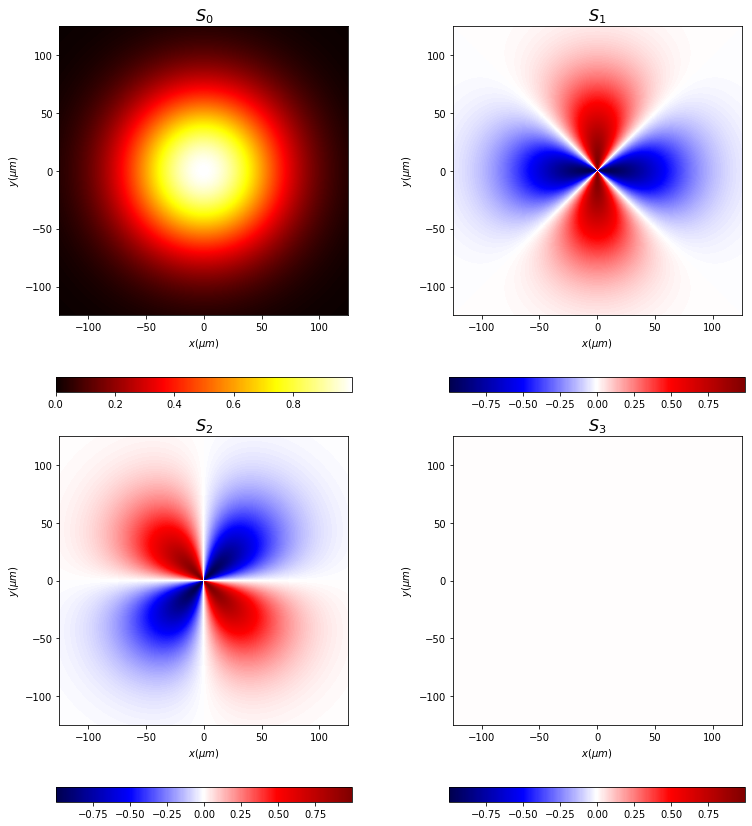

In [31]:
EM.draw('stokes');

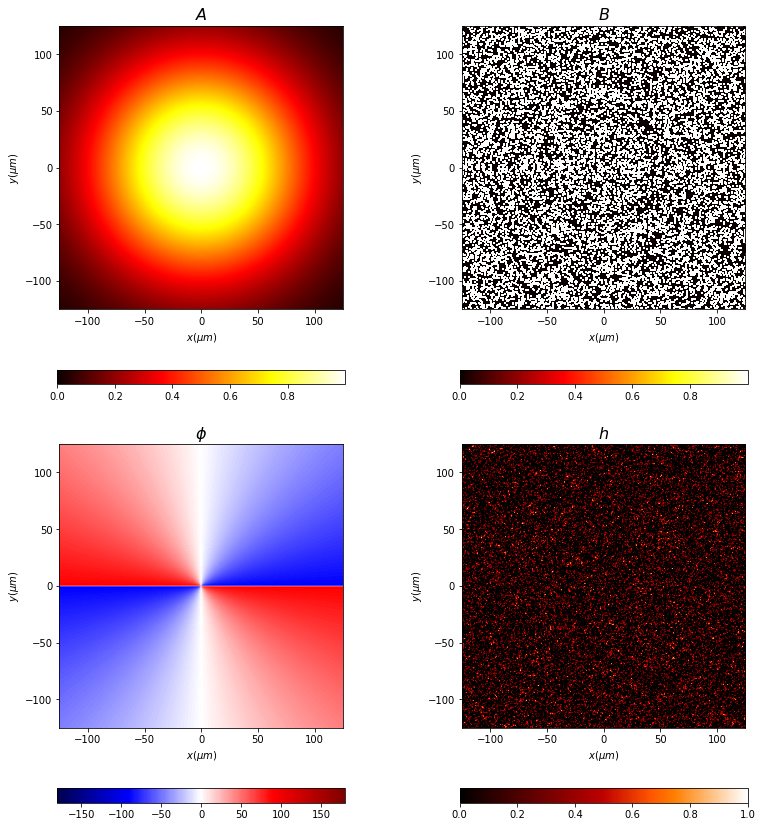

In [32]:
EM.draw('param_ellipse');

### Multiplying fields by mask
We can have complex vector mask using the functions based on Scalar_XY masks. Also, vector masks are provided which act as simple polarizers.

In [33]:
# Quarter waveplate
M1=Vector_paraxial_mask_XY(x=x0, y=y0, wavelength=wavelength)
M1.polarizer_linear(angle=45*degrees)

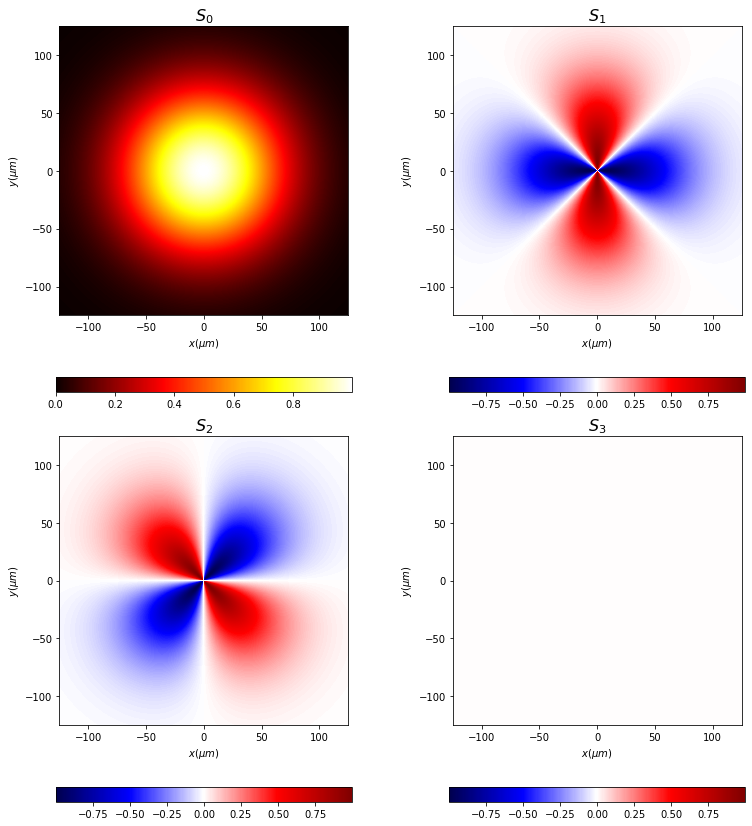

In [34]:
EM1=EM*M1
EM1.draw('stokes');

Other way to obtain mask is using Scalar_XY masks.

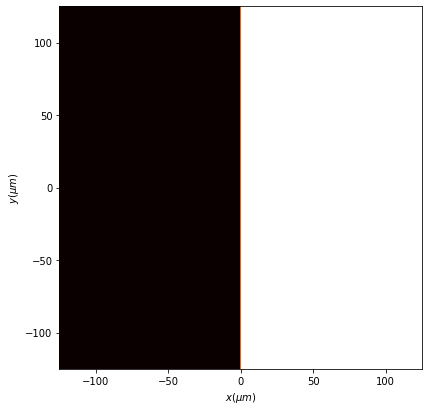

In [35]:
t0=Scalar_mask_XY(x0,y0,wavelength)
t0.two_levels(level1=0, level2=1, xcorte=0, angle=0)
t0.draw();

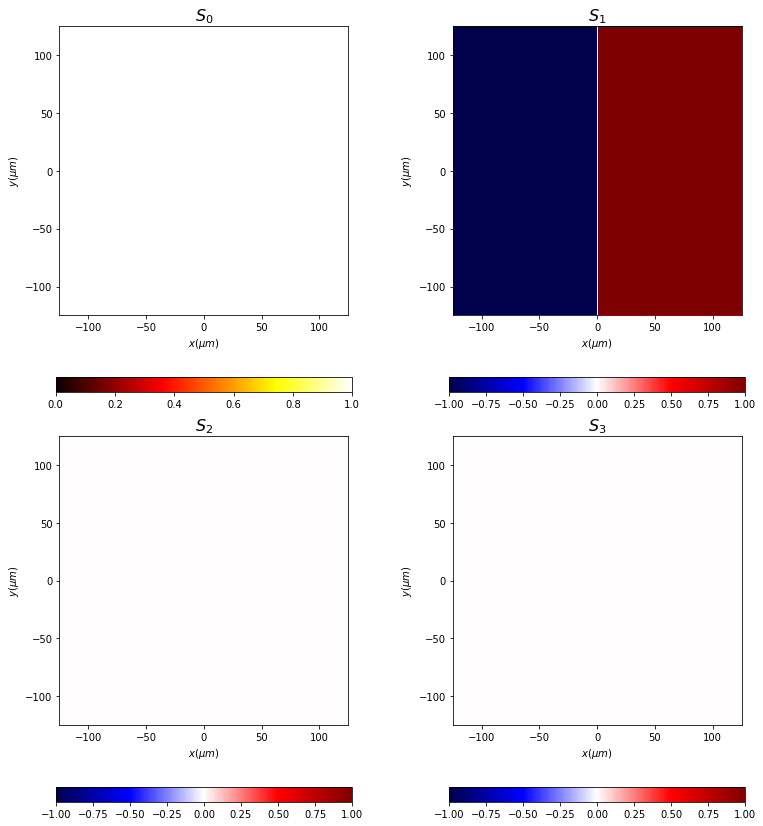

In [36]:
M2=Vector_paraxial_mask_XY(x=x0, y=y0, wavelength=wavelength)
M2.complementary_masks(t0, v1=(1, 0), v2=(0,1))
M2.draw('stokes');

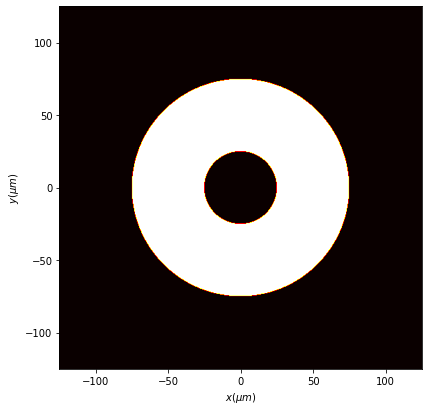

In [37]:
t1=Scalar_mask_XY(x0,y0,wavelength)
t1.ring(r0=(0,0), radius1=(25*um,25*um), radius2=(75*um,75*um), angle=0.0)

t1.draw();


In [38]:
M3=Vector_paraxial_mask_XY(x0,y0,wavelength)
M3.equal_masks(t1)

In [39]:
EM2=EM*M2*M3

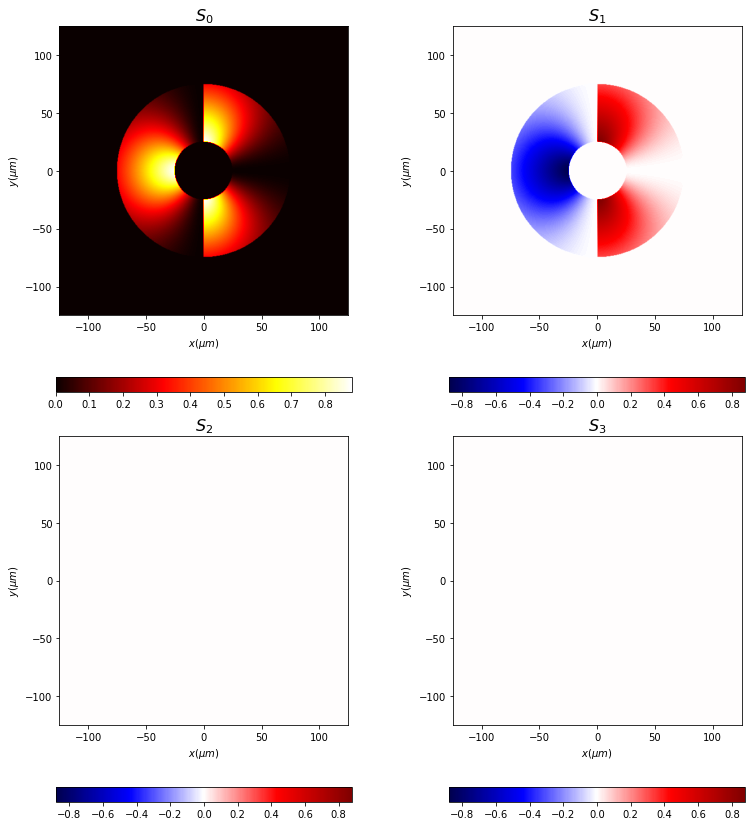

In [40]:
EM2.draw('stokes');

### Propagation
Vector fields can be propagated using Rayleigh-Sommerfeld approach.

In [46]:
EM3=EM2.RS(z=10*mm)

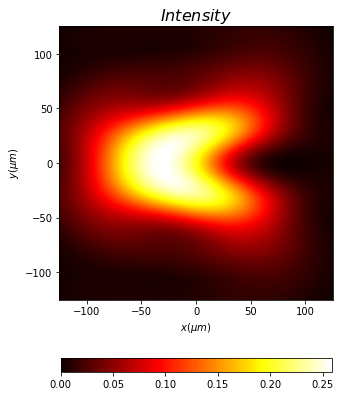

In [47]:
EM3.draw('intensity');

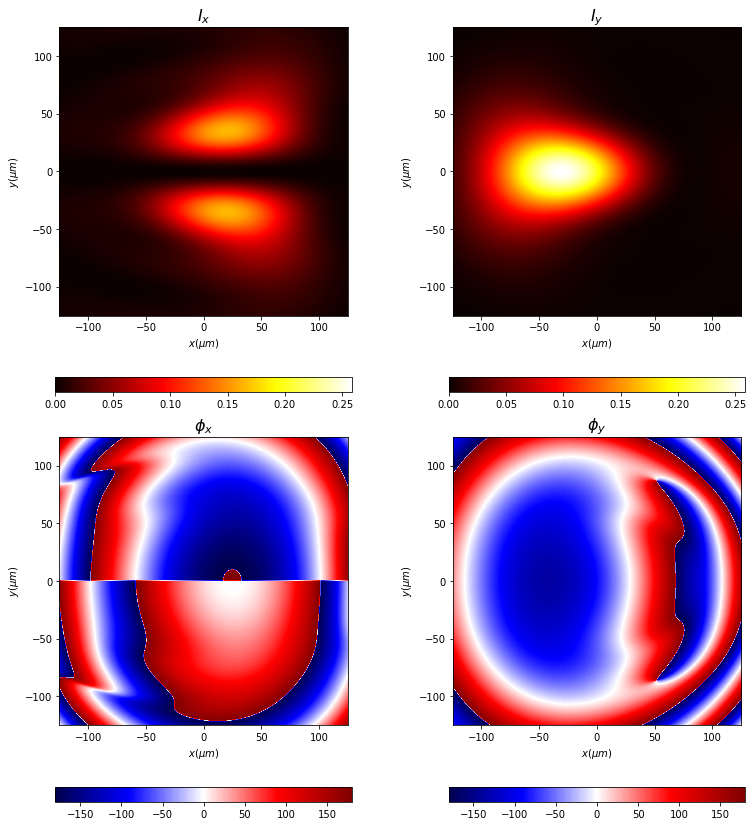

In [48]:
EM3.draw('fields');

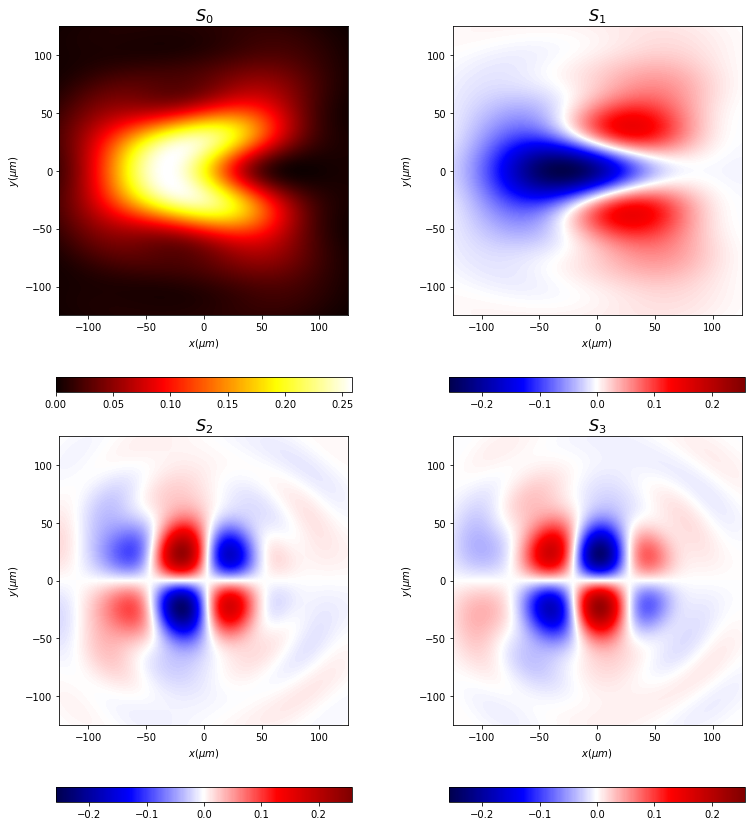

In [49]:
EM3.draw('stokes');

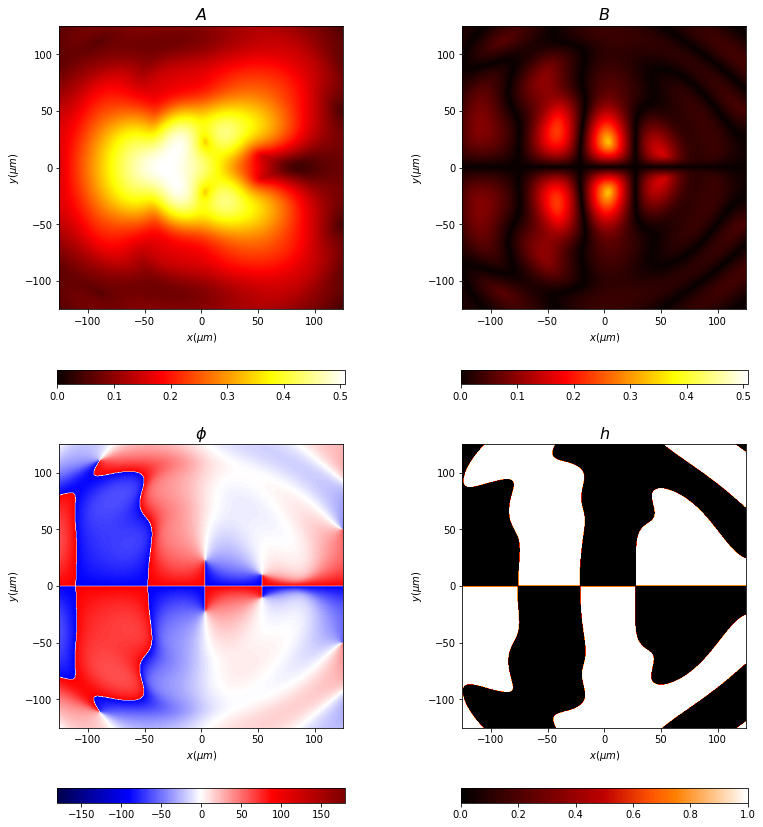

In [50]:
EM3.draw('param_ellipse');